<a href="https://colab.research.google.com/github/faisal-rasheed-lone/Machine_Learning/blob/main/Cat-Dog-classificatiom-using-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faisalrasheedlone","key":"795580a1cec1fb56bc14d8d5f1f04090"}'}

In [3]:
# making directory
!mkdir ~/.kaggle

In [4]:
# copy the kaggle json to directory
!cp kaggle.json ~/.kaggle/

In [5]:
# permission for json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# listing all datasets in kaggle
!kaggle datasets list

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats


100% 1.06G/1.06G [00:31<00:00, 42.2MB/s]
100% 1.06G/1.06G [00:31<00:00, 36.4MB/s]


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [10]:
# geenrators - creating batches
train_ds = keras.utils.image_dataset_from_directory(directory = '/content/train',
                                                    labels = 'inferred',
                                                    label_mode = 'int',
                                                    batch_size = 32,
                                                    image_size = (256,256))

validation_ds = keras.utils.image_dataset_from_directory(directory = '/content/test',
                                                    labels = 'inferred',
                                                    label_mode = 'int',
                                                    batch_size = 32,
                                                    image_size = (256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# performing Normalization
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image,label


In [12]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

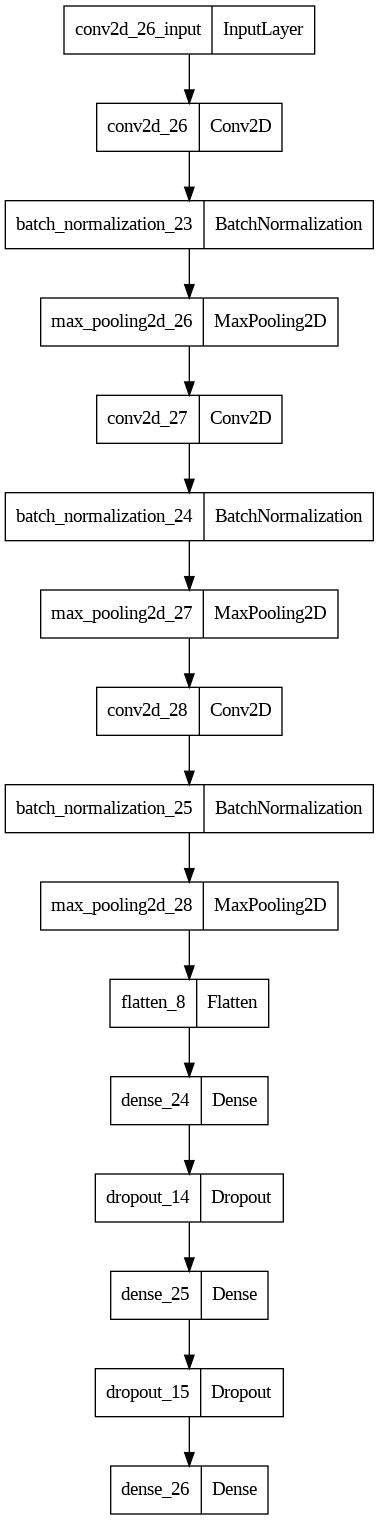

In [109]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers import Dropout
# creating a CNN model
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
keras.utils.plot_model(model)

In [110]:
# compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
# fitting the model
history = model.fit(train_ds, epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 72s 110ms/step - loss: 1.3592 - accuracy: 0.5768 - val_loss: 0.7391 - val_accuracy: 0.5796
Epoch 2/5
625/625 [==============================] - 69s 110ms/step - loss: 0.5883 - accuracy: 0.6956 - val_loss: 0.5693 - val_accuracy: 0.7096
Epoch 3/5
625/625 [==============================] - 68s 109ms/step - loss: 0.5082 - accuracy: 0.7555 - val_loss: 0.5129 - val_accuracy: 0.7484
Epoch 4/5
625/625 [==============================] - 69s 109ms/step - loss: 0.4392 - accuracy: 0.7957 - val_loss: 0.4683 - val_accuracy: 0.7850
Epoch 5/5
625/625 [==============================] - 68s 108ms/step - loss: 0.3858 - accuracy: 0.8279 - val_loss: 0.4752 - val_accuracy: 0.7908


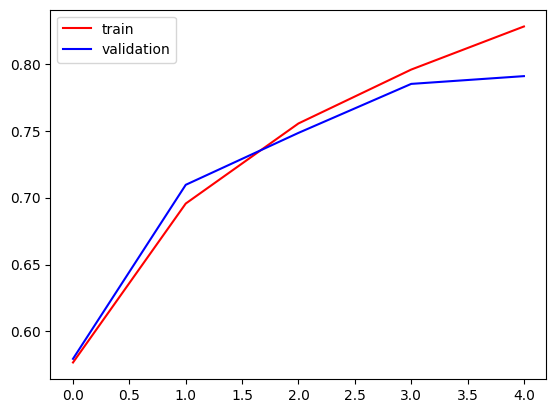

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color ='red', label = 'train')
plt.plot(history.history['val_accuracy'], color ='blue', label = 'validation')
plt.legend()
plt.show()


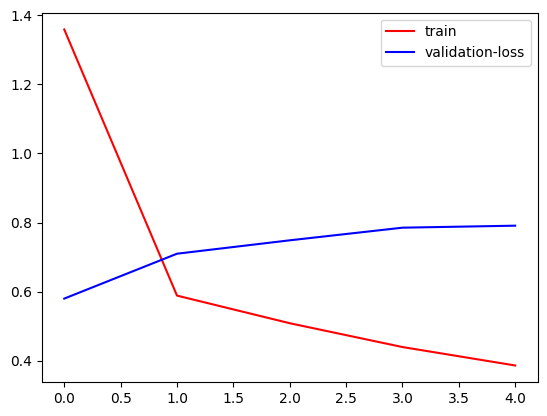

In [113]:
plt.plot(history.history['loss'], color ='red', label = 'train')
plt.plot(history.history['val_accuracy'], color ='blue', label = 'validation-loss')
plt.legend()
plt.show()

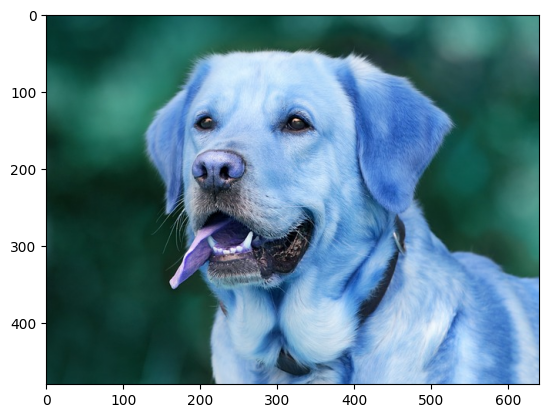

In [131]:
import cv2
test_img =cv2.imread('/content/dogg.jpg')
plt.imshow(test_img)



In [ ]:
test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)